In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
df = pd.read_excel('C:/Users/Polzovatel/Downloads/RLMS.xlsx')

In [6]:
df

,year,age,marst,kids18,female,wage,nonlabinc,hours,diplom,exper
0,1998,25.0,1.0,NaN,1,294.0,0.0,30.0,2.0,6.0
1,1998,27.0,1.0,NaN,0,1416.0,144.0,40.0,1.0,12.0
2,1998,43.0,0.0,NaN,1,950.0,450.0,48.0,1.0,27.0
3,1998,54.0,0.0,NaN,1,188.0,200.0,25.0,1.0,35.0
4,1998,30.0,0.0,NaN,1,1200.0,250.0,36.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...
123444,2018,38.0,1.0,NaN,0,25000.0,0.0,40.0,1.0,NaN
123445,2018,50.0,0.0,1.0,0,25000.0,44886.0,80.0,2.0,NaN
123446,2018,35.0,1.0,1.0,1,20000.0,0.0,36.0,1.0,NaN
123447,2018,52.0,0.0,0.0,1,23000.0,0.0,66.0,1.0,NaN


In [7]:
main_df = df[df['year'] == 2010]

In [8]:
main_df

,year,age,marst,kids18,female,wage,nonlabinc,hours,diplom,exper
51676,2010,37.0,0.0,1.0,1,11670.0,9000.0,25.0,3.0,NaN
51677,2010,26.0,1.0,NaN,1,11500.0,NaN,36.0,0.0,NaN
51678,2010,50.0,0.0,0.0,1,18000.0,0.0,70.0,1.0,NaN
51679,2010,33.0,1.0,1.0,0,22000.0,0.0,96.0,0.0,NaN
51680,2010,62.0,1.0,0.0,0,12000.0,8000.0,36.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
60584,2010,26.0,1.0,1.0,1,5800.0,0.0,40.0,1.0,NaN
60585,2010,28.0,1.0,1.0,0,25000.0,0.0,40.0,3.0,NaN
60586,2010,37.0,1.0,1.0,1,8000.0,0.0,50.0,0.0,NaN
60587,2010,19.0,1.0,NaN,1,5000.0,0.0,40.0,0.0,NaN


In [9]:
main_df.shape

(8913, 10)

In [10]:
main_df1 = main_df.drop('year', axis=1).copy()

In [11]:
main_df1.head(20)

,age,marst,kids18,female,wage,nonlabinc,hours,diplom,exper
51676,37.0,0.0,1.0,1,11670.0,9000.0,25.0,3.0,NaN
51677,26.0,1.0,NaN,1,11500.0,NaN,36.0,0.0,NaN
51678,50.0,0.0,0.0,1,18000.0,0.0,70.0,1.0,NaN
51679,33.0,1.0,1.0,0,22000.0,0.0,96.0,0.0,NaN
51680,62.0,1.0,0.0,0,12000.0,8000.0,36.0,3.0,NaN
51681,32.0,1.0,1.0,1,5000.0,0.0,35.0,1.0,NaN
51682,36.0,1.0,1.0,0,15000.0,0.0,64.0,1.0,NaN
51683,26.0,0.0,NaN,0,15000.0,0.0,32.0,0.0,NaN
51684,56.0,1.0,0.0,1,14700.0,8400.0,48.0,0.0,NaN
51685,53.0,1.0,0.0,0,20514.0,0.0,50.0,1.0,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A6078DC08>,
      dtype=object)

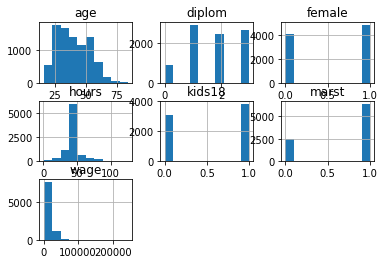

In [12]:
main_df1.hist([x for x in main_df1.columns if x != 'exper' and x != 'nonlabinc'])

In [13]:
main_df1['exper']

51676   NaN
51677   NaN
51678   NaN
51679   NaN
51680   NaN
         ..
60584   NaN
60585   NaN
60586   NaN
60587   NaN
60588   NaN
Name: exper, Length: 8913, dtype: float64

In [14]:
main_df1['exper'].isna().sum()

8913

In [15]:
main_df1 = main_df1.drop('exper', axis=1)

Text(0, 0.5, 'age')

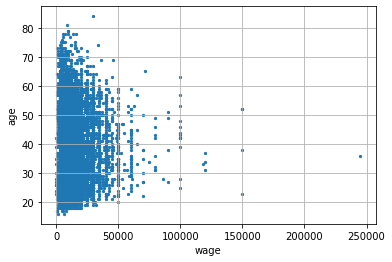

In [16]:
fig, ax = plt.subplots()
ax.scatter(main_df1['wage'], main_df1['age'], s=5)
ax.grid()
ax.set_xlabel('wage')
ax.set_ylabel('age')

Text(0, 0.5, 'marst')

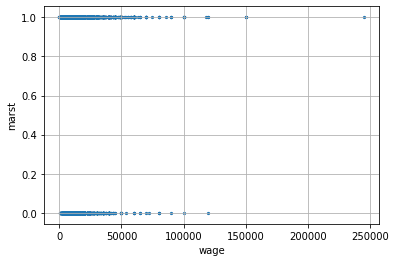

In [17]:
fig, ax = plt.subplots()
ax.scatter(main_df1['wage'], main_df1['marst'], s=5)
ax.grid()
ax.set_xlabel('wage')
ax.set_ylabel('marst')

Text(0, 0.5, 'kids18')

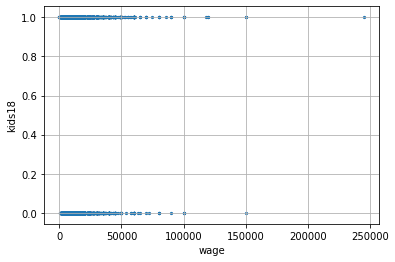

In [18]:
fig, ax = plt.subplots()
ax.scatter(main_df1['wage'], main_df1['kids18'], s=5)
ax.grid()
ax.set_xlabel('wage')
ax.set_ylabel('kids18')

Text(0, 0.5, 'female')

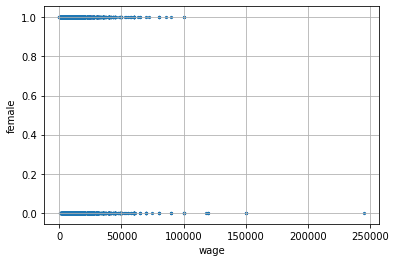

In [19]:
fig, ax = plt.subplots()
ax.scatter(main_df1['wage'], main_df1['female'], s=5)
ax.grid()
ax.set_xlabel('wage')
ax.set_ylabel('female')

Text(0, 0.5, 'nonlabinc')

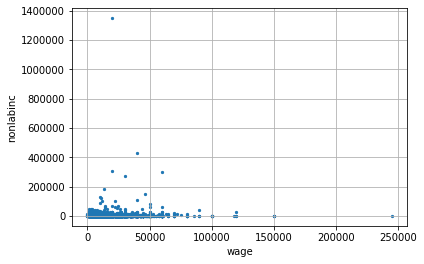

In [20]:
fig, ax = plt.subplots()
ax.scatter(main_df1['wage'], main_df1['nonlabinc'], s=5)
ax.grid()
ax.set_xlabel('wage')
ax.set_ylabel('nonlabinc')

Text(0, 0.5, 'hours')

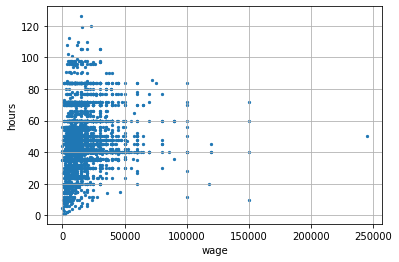

In [21]:
fig, ax = plt.subplots()
ax.scatter(main_df1['wage'], main_df1['hours'], s=5)
ax.grid()
ax.set_xlabel('wage')
ax.set_ylabel('hours')

Text(0, 0.5, 'diplom')

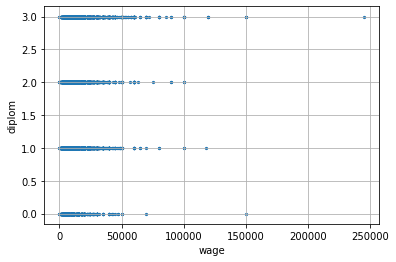

In [22]:
fig, ax = plt.subplots()
ax.scatter(main_df1['wage'], main_df1['diplom'], s=5)
ax.grid()
ax.set_xlabel('wage')
ax.set_ylabel('diplom')

In [23]:
wage = main_df1['wage']

In [24]:
wage.mean() # среднее

14573.03881970156

In [25]:
np.var(wage) # смещенная дисперсия

139611480.68535647

In [26]:
np.var(wage, ddof=1) # несмещеннная дисперсия

139627146.24647468

In [27]:
np.std(wage) # среднеквадратическое отклонение

11815.730222265422

In [28]:
wage.mode() # мода

0    10000.0
dtype: float64

In [29]:
confusion_mx0 = pd.crosstab(main_df1['marst'], main_df1['kids18'])
confusion_mx0

kids18,0.0,1.0
marst,,
0.0,824,546
1.0,2250,3275


In [30]:
confusion_mx1 = pd.crosstab(main_df1['marst'], main_df1['female'])
confusion_mx1

female,0,1
marst,,
0.0,788,1715
1.0,3315,3089


In [31]:
confusion_mx2 = pd.crosstab(main_df1['kids18'], main_df1['female'])
confusion_mx2

female,0,1
kids18,,
0.0,1193,1884
1.0,1804,2018


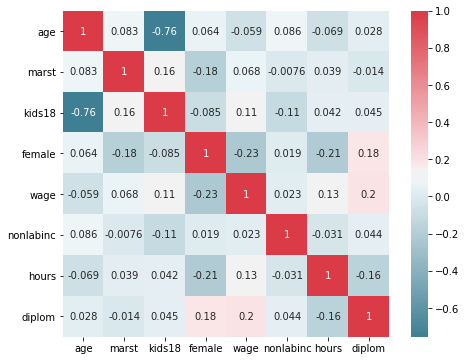

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
corr = main_df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax, annot=True)

In [52]:
X = main_df1[['kids18', 'female', 'nonlabinc', 'hours', 'diplom']]
results1 = smf.ols('wage ~ X', data=main_df1).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          1.44e-223
Time:                        14:39:24   Log-Likelihood:                -73781.
No. Observations:                6865   AIC:                         1.476e+05
Df Residuals:                    6859   BIC:                         1.476e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5970.7665    646.420      9.237      0.000    4703.583    7237.950
X[0]        1788.8924    276.626      6.467      0.000    1246.619    2331.165
X[1]       -6290.0434    285.035    -22.068      0.000   -6848.801   -5731.286
X[2]           0.0440      0.014      3.129      0.002       0.016       0.072
X[3]         122.4348     11.050     11.080      0.000     100.773     144.096
X[4]        3153.0892    143.212     22.017      0.000    2872.349    3433.829
==============================================================================
Omnibus:                     6074.708   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           451188.641
Skew:                           3.904   Prob(JB):                         0.00
Kurtosis:                      41.941   Cond. No.                     4.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X = main_df1[['age', 'marst', 'kids18', 'female', 'nonlabinc', 'hours', 'diplom']]
results = smf.ols('wage ~ X', data=main_df1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          5.60e-222
Time:                        14:20:32   Log-Likelihood:                -73737.
No. Observations:                6861   AIC:                         1.475e+05
Df Residuals:                    6853   BIC:                         1.475e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8263.4496   1259.070      6.563      0.000    5795.281    1.07e+04
X[0]         -36.7883     18.656     -1.972      0.049     -73.359      -0.217
X[1]        -350.0030    363.766     -0.962      0.336   -1063.097     363.091
X[2]        1192.9273    422.098      2.826      0.005     365.485    2020.370
X[3]       -6433.6587    300.510    -21.409      0.000   -7022.751   -5844.566
X[4]           0.0470      0.014      3.305      0.001       0.019       0.075
X[5]         120.8526     11.075     10.912      0.000      99.141     142.564
X[6]        3171.2870    143.651     22.076      0.000    2889.686    3452.888
==============================================================================
Omnibus:                     6080.625   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           453651.422
Skew:                           3.913   Prob(JB):                         0.00
Kurtosis:                      42.060   Cond. No.                     9.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
main_df1['ln_hours'] = np.log(main_df1['hours'])
main_df1['ln_hours']

51676    3.218876
51677    3.583519
51678    4.248495
51679    4.564348
51680    3.583519
           ...   
60584    3.688879
60585    3.688879
60586    3.912023
60587    3.688879
60588    3.401197
Name: ln_hours, Length: 8913, dtype: float64

In [36]:
main_df1['ln_wage'] = np.log(main_df1['wage'])
ln_wage = main_df1['ln_wage']
main_df1['ln_wage']

51676     9.364777
51677     9.350102
51678     9.798127
51679     9.998798
51680     9.392662
           ...    
60584     8.665613
60585    10.126631
60586     8.987197
60587     8.517193
60588     9.210340
Name: ln_wage, Length: 8913, dtype: float64

In [37]:
X = main_df1[['ln_hours']]
results = smf.ols('ln_wage ~ X', data=main_df1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     400.5
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           3.51e-87
Time:                        14:20:32   Log-Likelihood:                -9666.5
No. Observations:                8913   AIC:                         1.934e+04
Df Residuals:                    8911   BIC:                         1.935e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5026      0.092     81.657      0.000       7.322       7.683
X              0.4897      0.024     20.012      0.000       0.442       0.538
==============================================================================
Omnibus:                     1055.126   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4689.634
Skew:                          -0.508   Prob(JB):                         0.00
Kurtosis:                       6.405   Cond. No.                         48.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# точечный прогноз
y_1 = 5970.7665 + main_df1['nonlabinc'].mean() * 0.044 + main_df1['hours'].mean() * 122.4348
y_1

11471.964483607882

In [39]:
main_df2 = main_df1.copy()

In [40]:
main_df2['mean_nonlabinc'] = main_df1['nonlabinc'].mean()

In [41]:
main_df2['mean_hours'] = main_df1['hours'].mean()
main_df2

,age,marst,kids18,female,wage,nonlabinc,hours,diplom,ln_hours,ln_wage,mean_nonlabinc,mean_hours
51676,37.0,0.0,1.0,1,11670.0,9000.0,25.0,3.0,3.218876,9.364777,2564.329198,44.010098
51677,26.0,1.0,NaN,1,11500.0,NaN,36.0,0.0,3.583519,9.350102,2564.329198,44.010098
51678,50.0,0.0,0.0,1,18000.0,0.0,70.0,1.0,4.248495,9.798127,2564.329198,44.010098
51679,33.0,1.0,1.0,0,22000.0,0.0,96.0,0.0,4.564348,9.998798,2564.329198,44.010098
51680,62.0,1.0,0.0,0,12000.0,8000.0,36.0,3.0,3.583519,9.392662,2564.329198,44.010098
...,...,...,...,...,...,...,...,...,...,...,...,...
60584,26.0,1.0,1.0,1,5800.0,0.0,40.0,1.0,3.688879,8.665613,2564.329198,44.010098
60585,28.0,1.0,1.0,0,25000.0,0.0,40.0,3.0,3.688879,10.126631,2564.329198,44.010098
60586,37.0,1.0,1.0,1,8000.0,0.0,50.0,0.0,3.912023,8.987197,2564.329198,44.010098
60587,19.0,1.0,NaN,1,5000.0,0.0,40.0,0.0,3.688879,8.517193,2564.329198,44.010098


In [42]:
X = main_df2[['nonlabinc', 'hours']]
results = smf.ols('wage ~ X', data=main_df2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     84.30
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           5.43e-37
Time:                        14:20:33   Log-Likelihood:                -95655.
No. Observations:                8867   AIC:                         1.913e+05
Df Residuals:                    8864   BIC:                         1.913e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9021.9970    448.793     20.103      0.000    8142.258    9901.736
X[0]           0.0185      0.007      2.540      0.011       0.004       0.033
X[1]         125.1860      9.775     12.806      0.000     106.024     144.348
==============================================================================
Omnibus:                     7540.283   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           451489.099
Skew:                           3.743   Prob(JB):                         0.00
Kurtosis:                      37.147   Cond. No.                     6.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
main_df2.shape

(6861, 12)

In [55]:
wage1 = main_df2['wage']
X = main_df2[['kids18', 'female', 'nonlabinc', 'hours', 'diplom']]
results1 = smf.ols('wage1 ~ X', data=main_df2).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wage1   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     225.4
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          2.32e-223
Time:                        14:41:15   Log-Likelihood:                -73740.
No. Observations:                6861   AIC:                         1.475e+05
Df Residuals:                    6855   BIC:                         1.475e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5978.8303    646.769      9.244      0.000    4710.963    7246.698
X[0]        1789.7797    276.761      6.467      0.000    1247.243    2332.316
X[1]       -6294.8893    285.148    -22.076      0.000   -6853.867   -5735.911
X[2]           0.0440      0.014      3.127      0.002       0.016       0.072
X[3]         122.4008     11.053     11.074      0.000     100.734     144.067
X[4]        3149.3734    143.304     21.977      0.000    2868.454    3430.293
==============================================================================
Omnibus:                     6071.686   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           450851.328
Skew:                           3.905   Prob(JB):                         0.00
Kurtosis:                      41.937   Cond. No.                     4.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
# расчет показателей для интервального прогноза
res = results1.predict()
rss = np.sum(np.square(wage1 - res))
S_e2 = rss / 6865
S_e2 = S_e2 * 6865 / 6849
S_e2
X = np.asmatrix(main_df2[['nonlabinc', 'hours']])
X_r = np.array([main_df2['nonlabinc'].mean(), main_df2['hours'].mean()])
Y = np.array(main_df2['wage'])
Y = np.transpose(Y)
a = (np.transpose(X).dot(X)) ** (-1)
S_p2 = S_e2 * (1 + np.transpose(X_r).dot(a).dot(X_r))
S_p = np.sqrt(S_p2)
S_p = float(S_p*1.96)

In [92]:
# интервальный прогноз
[y_1 - S_p*1.96, y_1 + S_p*1.96]

[-31812.63509484379, 54756.56406205955]

In [89]:
sfsf = main_df1.sort_values('wage').copy()
sfsf.tail(200)

,age,marst,kids18,female,wage,nonlabinc,hours,diplom,ln_hours,ln_wage
52687,32.0,1.0,1.0,0,45000.0,0.0,56.0,3.0,4.025352,10.714418
59219,49.0,1.0,0.0,0,45000.0,0.0,60.0,1.0,4.094345,10.714418
56701,55.0,1.0,0.0,0,45000.0,0.0,84.0,0.0,4.430817,10.714418
59413,42.0,1.0,1.0,1,45000.0,1000.0,30.0,3.0,3.401197,10.714418
55709,56.0,1.0,0.0,0,45000.0,0.0,41.0,3.0,3.713572,10.714418
...,...,...,...,...,...,...,...,...,...,...
59531,52.0,1.0,0.0,0,150000.0,0.0,40.0,3.0,3.688879,11.918391
52328,38.0,1.0,1.0,0,150000.0,0.0,72.0,0.0,4.276666,11.918391
57376,23.0,1.0,NaN,0,150000.0,0.0,10.0,3.0,2.302585,11.918391
59514,52.0,1.0,1.0,0,150000.0,0.0,60.0,3.0,4.094345,11.918391
